In [1]:
#Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [43]:
# Chargement de l'ensemble de données
data = pd.read_csv('bank-full.csv', sep=";")

In [51]:
# Afficher les premières lignes et des informations récapitulatives sur l'ensemble
#de données
data_info = data.info()
first_few_rows = data.head()
print(first_few_rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
   age           job  marital  education default  balance housing loan  \
0   58    management  mar

In [49]:
# Statistiques récapitulatives pour les variables numériques
summary_statistics = data.describe()
print(summary_statistics)

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [47]:
# Rechercher les valeurs nulles
missing_values = data.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [37]:
# Définir le style pour le plot
sns.set(style="whitegrid")

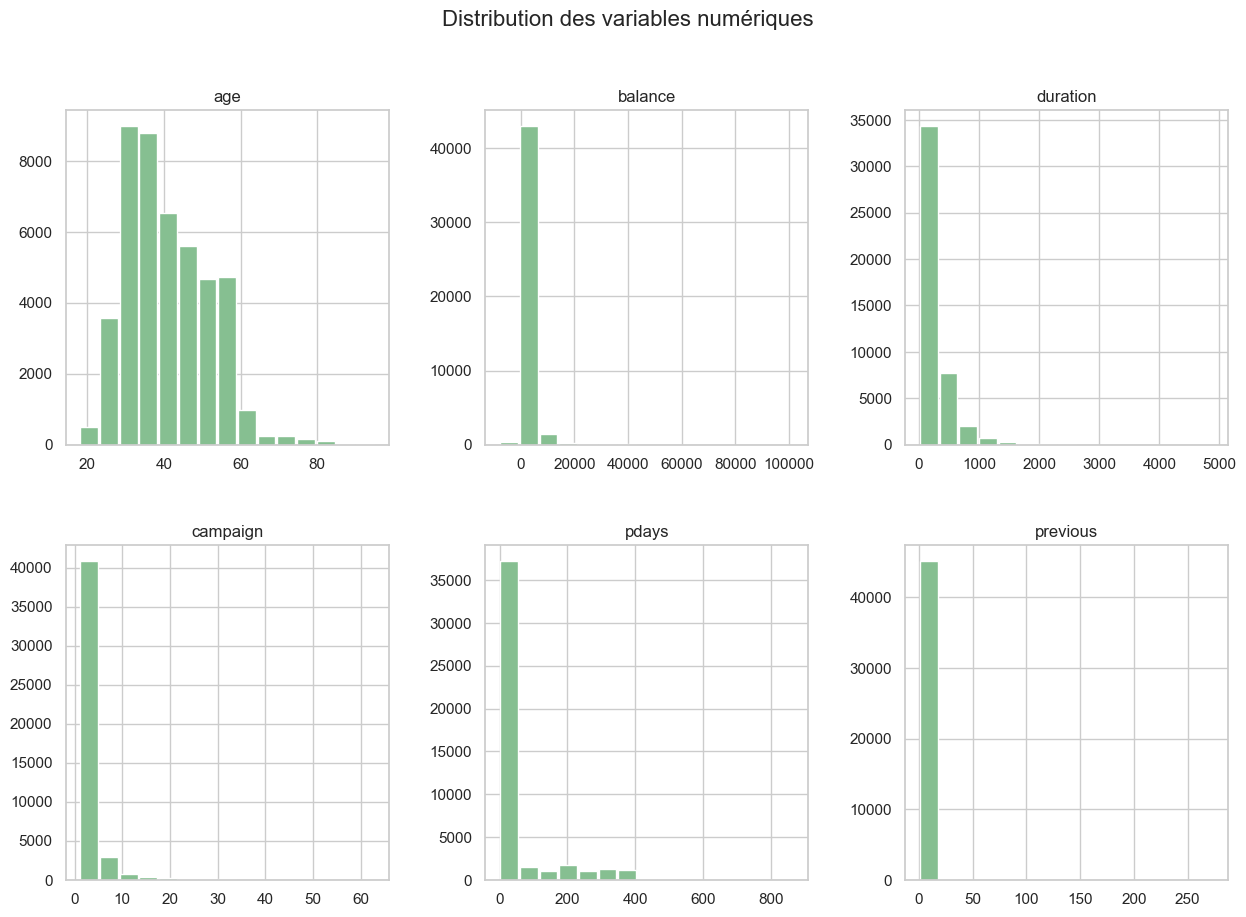

In [53]:
# Tracer des histogrammes pour les variables numériques
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
data[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(2, 3), color='#86bf91', zorder=2, rwidth=0.9)
plt.suptitle('Distribution des variables numériques', fontsize=16)
plt.show()#

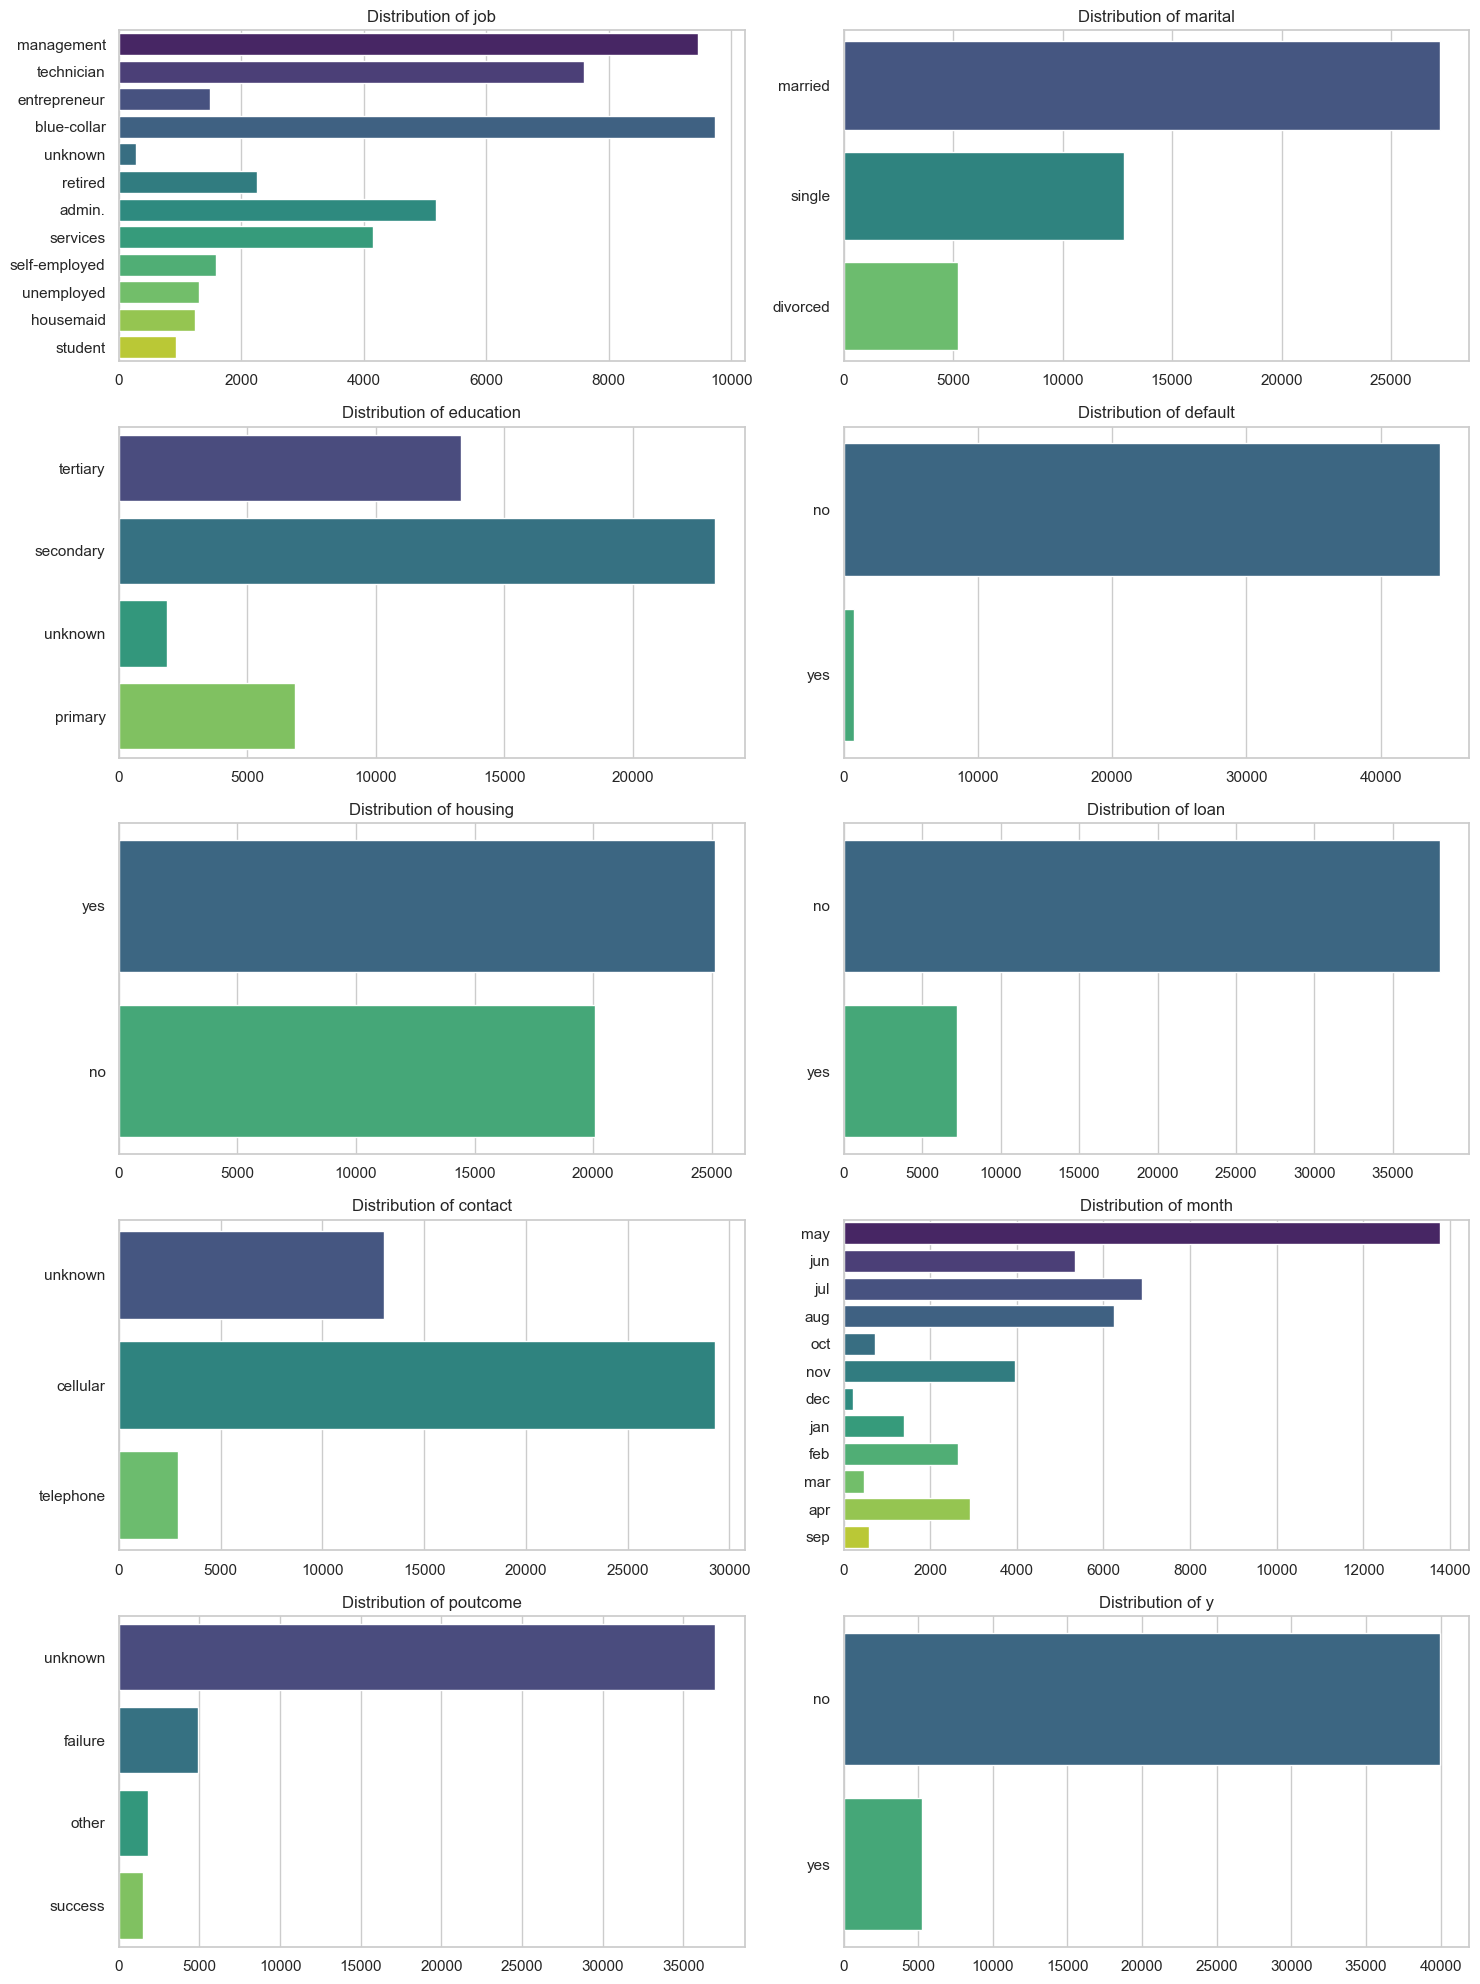

In [57]:
#Diagramme en barres pour les variables catégorielles
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=data, ax=axes[i//2, i%2], palette='viridis', hue=col, legend=False)
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
plt.tight_layout()
plt.show()

encoder les variables catégorielles

In [62]:
# Copie du DataFrame data
encoded_data = data.copy()

#Création d'un dictionnaire pour stocker les encodeurs
label_encoders = {}

# Boucle sur les variables catégorielles
for column in categorical_columns[:-1]: # Exclure 'y'
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [64]:
# Encodez la variable cible 'y'
le_y = LabelEncoder()
encoded_data['y'] = le_y.fit_transform(data['y'])

In [66]:
# Définir les fonctionnalités et la cible
X = encoded_data.drop(columns='y')
y = encoded_data['y']

In [68]:
# Divisez les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
# Mise à l'échelle des fonctionnalités
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# Ajuster un classificateur Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [76]:
# Générer la matrice de confusion, le rapport de classification et les données
# de la courbe ROC
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le_y.classes_)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [78]:
# Création de cadres de données pour les statistiques récapitulatives, la matrice
# de confusion et le rapport de classification
summary_statistics_df = summary_statistics

conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=["Actual No", "Actual Yes"], 
                              columns=["Predicted No", "Predicted Yes"])

class_report_df = pd.DataFrame(classification_report(y_test, y_pred, target_names=le_y.classes_, output_dict=True)).transpose()

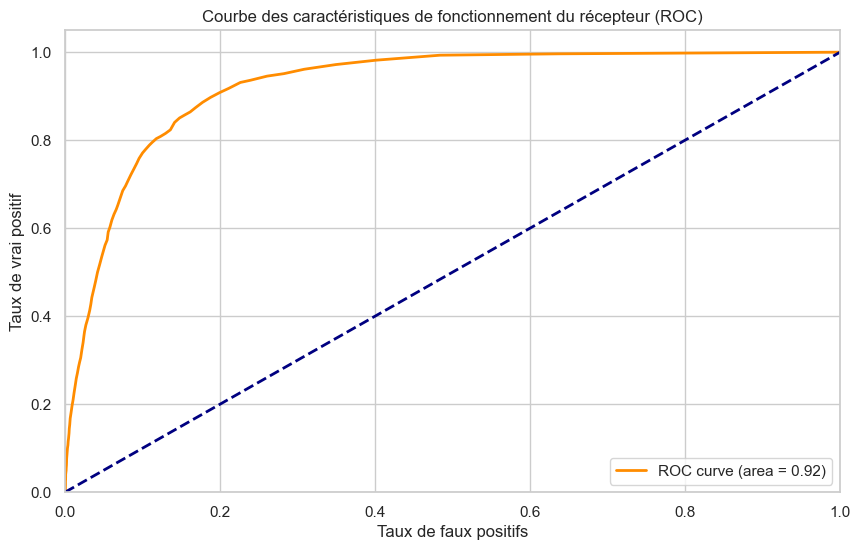

In [80]:
# Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positif')
plt.title('Courbe des caractéristiques de fonctionnement du récepteur (ROC)')
plt.legend(loc="lower right")
plt.show()

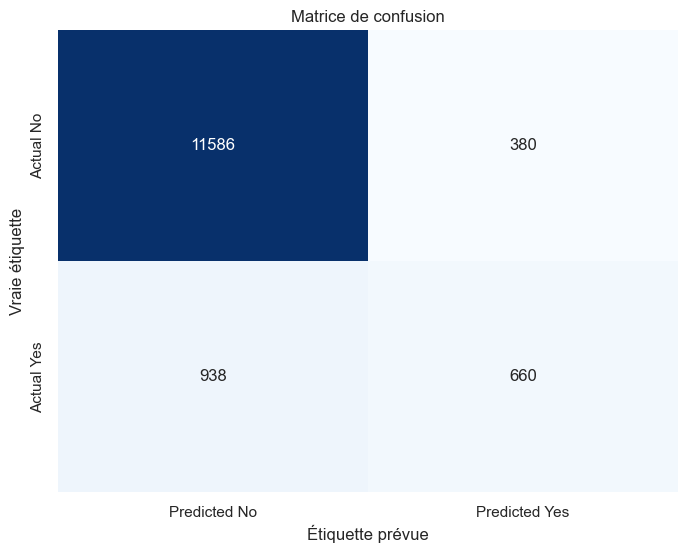

In [82]:
# Tracer la matrice de confusion sous forme de carte thermique
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de confusion")
plt.xlabel("Étiquette prévue")
plt.ylabel("Vraie étiquette")
plt.show()